# Maximizing Profitability Through SKU & Category Sales Analysis: A Deep Dive into Amazon E-Commerce Data

## 📌 Project Overview

This project performs an **SKU & Category Sales Analysis** on an **Amazon E-commerce dataset** using Python.
The goal is to uncover **patterns, trends, and insights** that drive revenue, profitability, and operational efficiency across different product categories and SKUs.

By analyzing sales, quantities, fulfillment methods, and B2B performance, this project identifies **top-performing SKUs**, **underperforming items**, and **weekly demand cycles** — helping businesses focus on what matters most.

Through **exploratory data analysis (EDA)**, **Pareto (80/20) distribution**, and **category-level aggregation**, we aim to answer key business questions like:

* Which SKUs and categories contribute most to revenue?
* How concentrated is revenue among top products?
* What are the underperforming SKUs that need action?
* How do fulfillment types and B2B orders impact sales?
* What are the demand trends over time?

This project forms a foundation for **data-driven decision-making** in e-commerce — from inventory planning to category management and pricing strategy.

---

### 🎯 Objectives:

* Import and clean Amazon e-commerce sales data
* Perform **exploratory data analysis** (EDA) to understand structure and patterns
* Compute **SKU-level and category-level revenue summaries**
* Conduct **Pareto (80/20) analysis** to identify high-impact SKUs
* Analyze **fulfillment method** and **B2B order performance**
* Detect **underperforming SKUs** and recommend corrective actions
* Visualize **weekly demand patterns** across major categories
* Generate a consolidated **Insights & Recommendations** report


**Dataset:** `amazon_sales.csv`
**Period Covered:** April 01, 2022 – June 29, 2022


## ⚙️ 1. Setup: imports and display settings

Imports the essential Python libraries (pandas, numpy, matplotlib, seaborn) and configures display options for Pandas and Seaborn. This ensures clean visuals and prevents column/row truncation. The %matplotlib inline makes plots display directly in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
sns.set(style='whitegrid')
%matplotlib inline

print("Notebook initialized. pandas version:", pd.__version__)


Notebook initialized. pandas version: 2.2.2


## 📂 1. Load dataset

Loads the amazon_sales.csv file into a Pandas DataFrame. Includes a file existence check for robustness and prints dataset dimensions plus columns list. This is the entry point for all downstream analysis.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# 2. Load dataset
data_path = Path('/content/drive/MyDrive/projects/amazon_sales_dataset/amazon_sales.csv')
if not data_path.exists():
    print(f"WARNING: {data_path} not found. Please upload the CSV file to the notebook folder.")
else:
    print(f"Found dataset at: {data_path}")

df = pd.read_csv(data_path)
df.shape, df.columns.tolist()


Found dataset at: /content/drive/MyDrive/projects/amazon_sales_dataset/amazon_sales.csv


/tmp/ipython-input-1144077197.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


((128975, 24),
 ['index',
  'Order ID',
  'Date',
  'Status',
  'Fulfilment',
  'Sales Channel ',
  'ship-service-level',
  'Style',
  'SKU',
  'Category',
  'Size',
  'ASIN',
  'Courier Status',
  'Qty',
  'currency',
  'Amount',
  'ship-city',
  'ship-state',
  'ship-postal-code',
  'ship-country',
  'promotion-ids',
  'B2B',
  'fulfilled-by',
  'Unnamed: 22'])

## 🔍 2. Initial inspection

Performs a quick exploration of the raw dataset:

- Shows the first 5 rows with `.head()`
- Prints data types (`dtypes`)
- Checks for missing values
    
This step gives a first impression of data quality and structure.
    

In [16]:
# Quick look: head, tail, info, missing values
display(df.head(5))
display(df.tail(5))
display(df.info)
print('\n--- Data Types ---')
print(df.dtypes)
print('\n--- Missing Values ---')
display(df.isnull().sum().sort_values(ascending=False).head(30))


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


<bound method DataFrame.info of          index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0        Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1        Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2          Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3        Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4          Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   
...           ...            ...                ...      ...              ...   
128970     Amazon      Amazon.in          Expedited  JNE3697    JNE3697-KR-XL   
128971     Amazon      Amazon.in          Expedited   SET401   SET401-KR-NP-M   
128972     Amazon      Amazon.in          Expedited    J0157     J0157-DR-XXL   
128973     Amazon      Amazon.in          Expedited    J0012     J0012-SKD-XS   
128974     Amazon      Amazon.in          Expedited    J0003      J0003-SET-S   

             Category Size        ASIN Courier Status  Qty currency   Amount  \
0                 Set    S  B09KXVBD7Z            NaN    0      INR   647.62   
1               kurta  3XL  B09K3WFS32        Shipped    1      INR   406.00   
2               kurta   XL  B07WV4JV4D        Shipped    1      INR   329.00   
3       Western Dress    L  B099NRCT7B            NaN    0      INR   753.33   
4                 Top  3XL  B098714BZP        Shipped    1      INR   574.00   
...               ...  ...         ...            ...  ...      ...      ...   
128970          kurta   XL  B098112V2V        Shipped    1      INR   517.00   
128971            Set    M  B09VC6KHX8        Shipped    1      INR   999.00   
128972  Western Dress  XXL  B0982YZ51B        Shipped    1      INR   690.00   
128973            Set   XS  B0894Y2NJQ        Shipped    1      INR  1199.00   
128974            Set    S  B0894X27FC        Shipped    1      INR   696.00   

          ship-city    ship-state  ship-postal-code ship-country  \
0            MUMBAI   MAHARASHTRA          400081.0           IN   
1         BENGALURU     KARNATAKA          560085.0           IN   
2       NAVI MUMBAI   MAHARASHTRA          410210.0           IN   
3        PUDUCHERRY    PUDUCHERRY          605008.0           IN   
4           CHENNAI    TAMIL NADU          600073.0           IN   
...             ...           ...               ...          ...   
128970    HYDERABAD     TELANGANA          500013.0           IN   
128971     GURUGRAM       HARYANA          122004.0           IN   
128972    HYDERABAD     TELANGANA          500049.0           IN   
128973        Halol       Gujarat          389350.0           IN   
128974       Raipur  CHHATTISGARH          492014.0           IN   

                                            promotion-ids    B2B fulfilled-by  \
0                                                     NaN  False    Easy Ship   
1       Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship   
2            IN Core Free


--- Data Types ---
index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

--- Missing Values ---


,0
fulfilled-by,89698
promotion-ids,49153
Unnamed: 22,49050
currency,7795
Amount,7795
Courier Status,6872
ship-country,33
ship-city,33
ship-state,33
ship-postal-code,33


### 🧹 Data cleaning & preparation

Cleans and preprocesses the dataset:

- Standardizes column names
- Converts date columns to datetime
- Ensures numerical types for `Qty` and `Amount`
- Drops empty rows and duplicates
- Creates derived columns: revenue per unit, day of week, and ISO week number
    
This is a critical stage to ensure data consistency before analysis.

In [17]:
# Make a working copy
df_clean = df.copy()

In [18]:
# Standardize column names (strip whitespace)
df_clean.columns = [c.strip() for c in df_clean.columns]
display(df_clean.head(3))

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [19]:
date_lengths = df_clean.Date.str.len()
date_lengths.value_counts()

,count
Date,
8,128975


In [20]:
if 'Date' in df_clean.columns:
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%m-%d-%y', errors='coerce')
df_clean['Date'].dtype

dtype('<M8[ns]')

In [21]:
# Qty and Amount -> numeric
for col in ['Qty','Amount']:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [22]:
# Drop fully empty rows
df_clean.dropna(how='all', inplace=True)

In [23]:
# Drop duplicates
df_clean.drop_duplicates(inplace=True)

In [24]:
# Derived fields
if 'Qty' in df_clean.columns and 'Amount' in df_clean.columns:
    # Avoid division by zero
    df_clean['rev_per_unit'] = df_clean.apply(
        lambda r: (r['Amount'] / r['Qty']) if pd.notnull(r['Amount']) and pd.notnull(r['Qty']) and r['Qty'] != 0 else np.nan,
        axis=1
    )

if 'Date' in df_clean.columns:
    df_clean['day_of_week'] = df_clean['Date'].dt.day_name()
    df_clean['week'] = df_clean['Date'].dt.isocalendar().week

In [ ]:
print('Cleaned dataframe shape:', df_clean.shape)
display(df_clean.head(3))

## 📊 3. High-level metrics & KPIs

Computes big-picture summary metrics:

- Total revenue
- Total units sold
- Unique SKUs
- Unique categories
    
  This forms a KPI table to benchmark performance at a glance.

In [25]:
# High-level metrics
total_revenue = df_clean['Amount'].sum() if 'Amount' in df_clean.columns else np.nan

In [26]:
total_units = df_clean['Qty'].sum() if 'Qty' in df_clean.columns else np.nan

In [27]:
unique_skus = df_clean['SKU'].nunique() if 'SKU' in df_clean.columns else np.nan

In [28]:
unique_categories = df_clean['Category'].nunique() if 'Category' in df_clean.columns else np.nan

In [29]:
kpi_table = pd.DataFrame({
    'metric':['total_revenue','total_units','unique_skus','unique_categories'],
    'value':[total_revenue, total_units, unique_skus, unique_categories]
})
display(kpi_table)

,metric,value
0,total_revenue,78592678.3
1,total_units,116649.0
2,unique_skus,7195.0
3,unique_categories,9.0


## 📈 4. Time-series: Revenue & Quantity over time

Aggregates data at the daily level and plots revenue and units sold trends. Helps identify peaks, dips, and seasonality in sales. Two line plots are created: one for revenue, one for quantity.

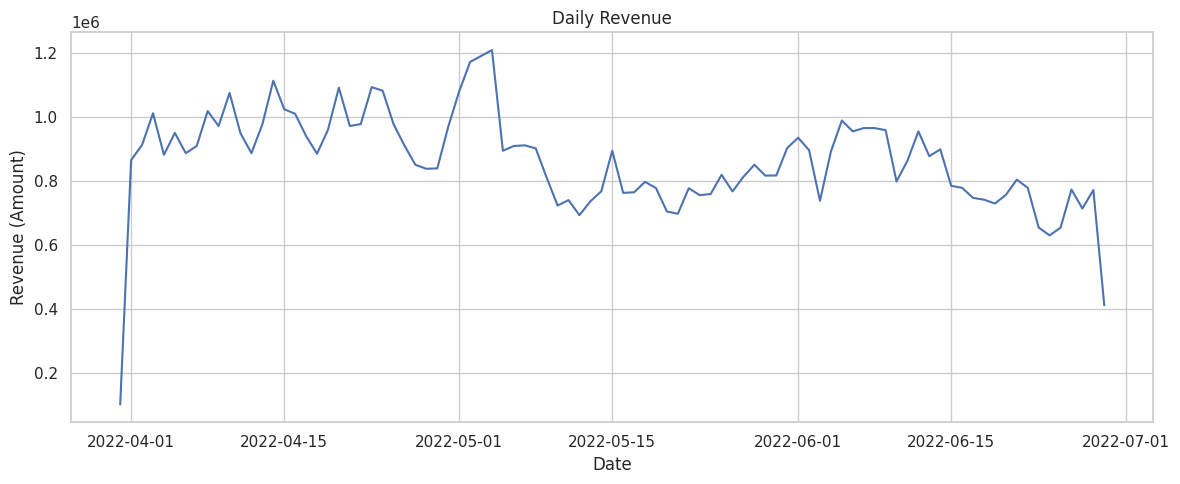

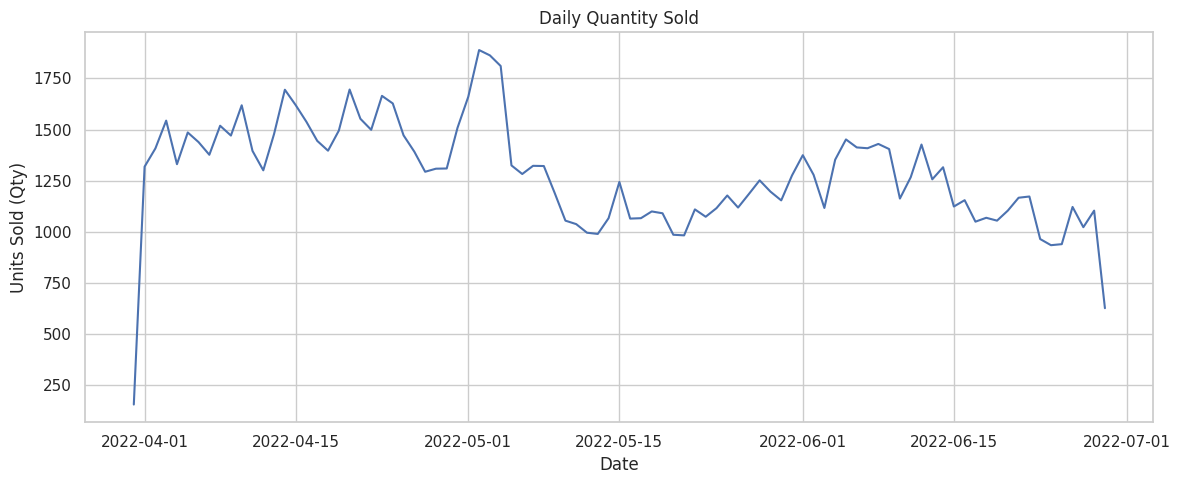

In [30]:
# Daily aggregates and plots
if 'Date' in df_clean.columns:
    daily = df_clean.groupby('Date').agg({'Amount':'sum','Qty':'sum'}).reset_index()
    plt.figure(figsize=(12,5))
    sns.lineplot(data=daily, x='Date', y='Amount')
    plt.title('Daily Revenue')
    plt.ylabel('Revenue (Amount)')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,5))
    sns.lineplot(data=daily, x='Date', y='Qty')
    plt.title('Daily Quantity Sold')
    plt.ylabel('Units Sold (Qty)')
    plt.tight_layout()
    plt.show()
else:
    print('Date column missing; cannot plot time-series.')


## 🏆 5. Top SKUs & Categories

Identifies the best-performing SKUs and categories by revenue. Creates bar charts for:

- Top 10 SKUs
- Top 15 categories
    
This highlights revenue concentration and market drivers.

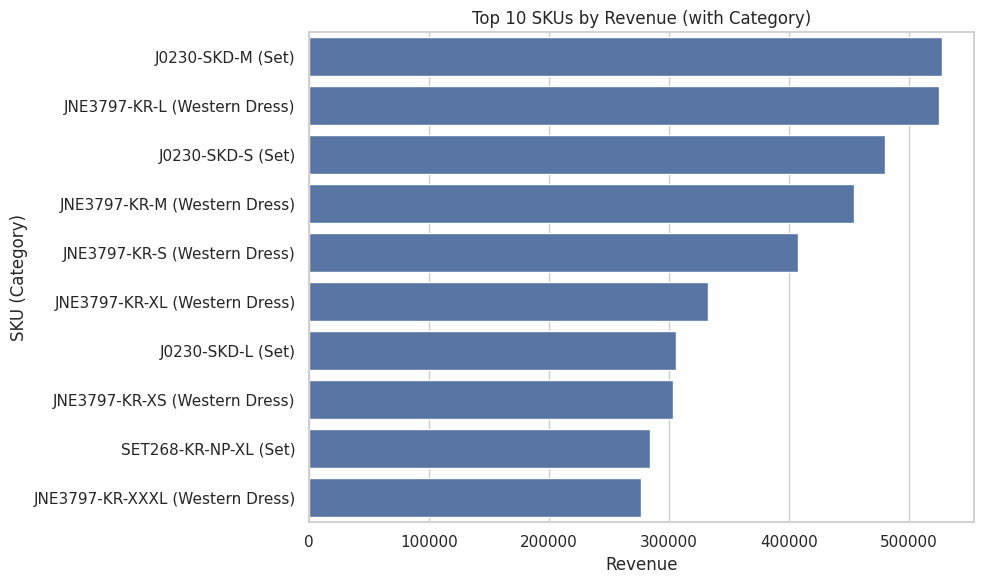

In [44]:
# Top SKUs by revenue
if 'SKU' in df_clean.columns and 'Amount' in df_clean.columns and 'Category' in df_clean.columns:
    sku_rev = df_clean.groupby('SKU')['Amount'].sum().sort_values(ascending=False).reset_index()
    # Get SKU to Category mapping
    sku_category_map = df_clean[['SKU', 'Category']].drop_duplicates()
    sku_rev = pd.merge(sku_rev, sku_category_map, on='SKU', how='left')

    top10_sku = sku_rev.head(10).copy() # Added .copy() to prevent SettingWithCopyWarning
    top10_sku['SKU_Category'] = top10_sku['SKU'] + ' (' + top10_sku['Category'] + ')'

    plt.figure(figsize=(10,6))
    sns.barplot(data=top10_sku, x='Amount', y='SKU_Category')
    plt.title('Top 10 SKUs by Revenue (with Category)')
    plt.xlabel('Revenue')
    plt.ylabel('SKU (Category)')
    plt.tight_layout()
    plt.show()
elif 'SKU' not in df_clean.columns or 'Amount' not in df_clean.columns:
    print('SKU or Amount column missing.')
else:
    print('Category column missing.')

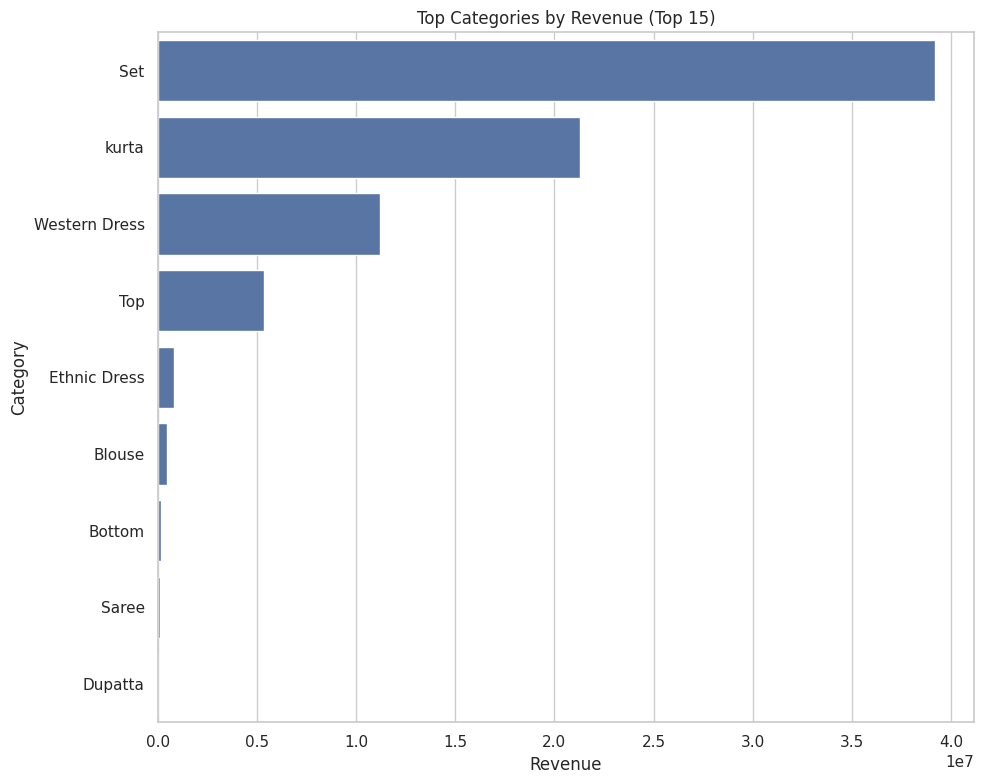

In [45]:
# Top Categories by revenue
if 'Category' in df_clean.columns and 'Amount' in df_clean.columns:
    cat_rev = df_clean.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(10,8))
    sns.barplot(data=cat_rev.head(15), x='Amount', y='Category')
    plt.title('Top Categories by Revenue (Top 15)')
    plt.xlabel('Revenue')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()
else:
    print('Category or Amount column missing.')


## 📉 6. Pareto Analysis (Revenue concentration across SKUs)

Creates a Pareto curve showing cumulative revenue share across SKUs. Marks the 80% revenue line to show how many SKUs contribute to the majority of sales. This gives a clear picture of SKU concentration.

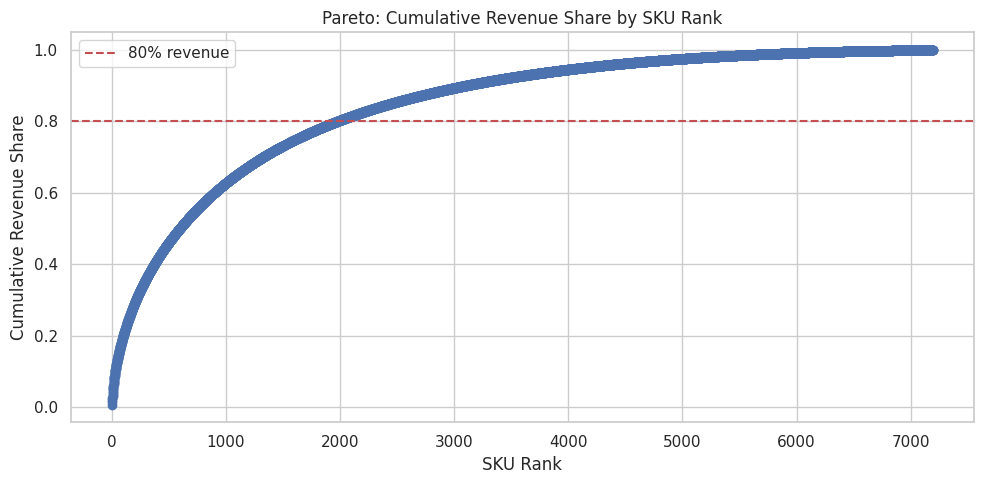

Approximately 1974 SKUs (~27.44%) generate 80% of revenue.


In [46]:
# Pareto curve: cumulative revenue share by SKU
if 'SKU' in df_clean.columns and 'Amount' in df_clean.columns:
    sku_rev_sorted = sku_rev.copy()
    sku_rev_sorted['cum_revenue'] = sku_rev_sorted['Amount'].cumsum()
    sku_rev_sorted['cum_share'] = sku_rev_sorted['cum_revenue'] / sku_rev_sorted['Amount'].sum()
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(sku_rev_sorted)+1), sku_rev_sorted['cum_share'].values, marker='o', linewidth=1)
    plt.axhline(0.8, color='r', linestyle='--', label='80% revenue')
    plt.title('Pareto: Cumulative Revenue Share by SKU Rank')
    plt.xlabel('SKU Rank')
    plt.ylabel('Cumulative Revenue Share')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Show how many SKUs make 80% revenue
    try:
        n_80 = sku_rev_sorted[sku_rev_sorted['cum_share'] <= 0.8].shape[0] + 1
        pct = n_80 / sku_rev_sorted.shape[0]
        print(f"Approximately {n_80} SKUs (~{pct:.2%}) generate 80% of revenue.")
    except Exception as e:
        print('Could not compute 80% SKU count:', e)
else:
    print('SKU or Amount missing for Pareto analysis.')


## ⚖️ 7. Revenue vs Quantity (SKU-level)

Plots a scatter of total quantity sold vs total revenue per SKU, both on log scales. This helps distinguish between:

*   High-revenue but low-volume items
*   Low-revenue high-volume items
*   Balanced SKUs



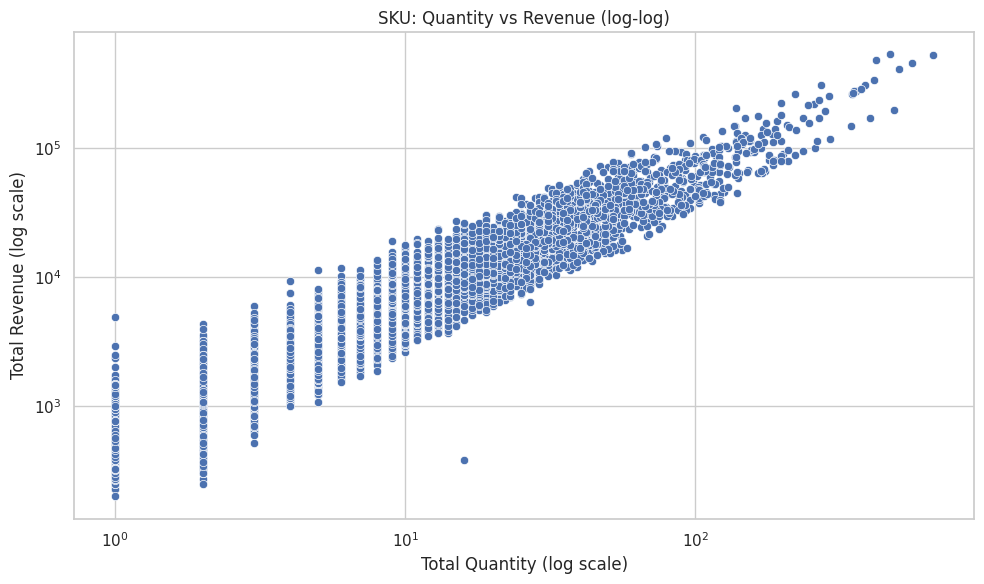

In [47]:
# SKU-level revenue vs quantity scatter
if 'SKU' in df_clean.columns and 'Amount' in df_clean.columns and 'Qty' in df_clean.columns:
    sku_level = df_clean.groupby('SKU').agg(total_revenue=('Amount','sum'), total_qty=('Qty','sum')).reset_index()
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=sku_level, x='total_qty', y='total_revenue')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Total Quantity (log scale)')
    plt.ylabel('Total Revenue (log scale)')
    plt.title('SKU: Quantity vs Revenue (log-log)')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns missing for revenue vs qty scatter.')


## 🚚 8. Fulfillment method & B2B vs B2C analysis

Looks at order fulfillment methods (pie chart) and splits revenue between B2B and B2C segments. This helps assess which channels contribute most and whether fulfillment strategies are balanced.

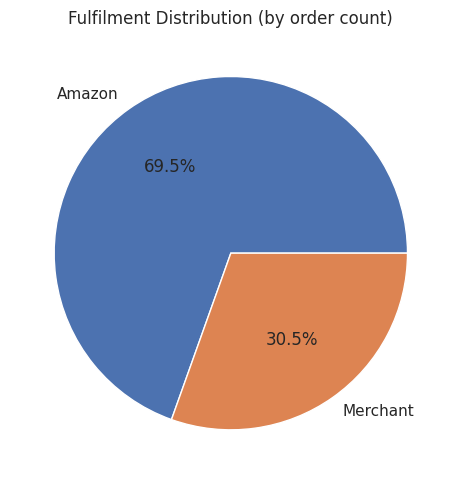

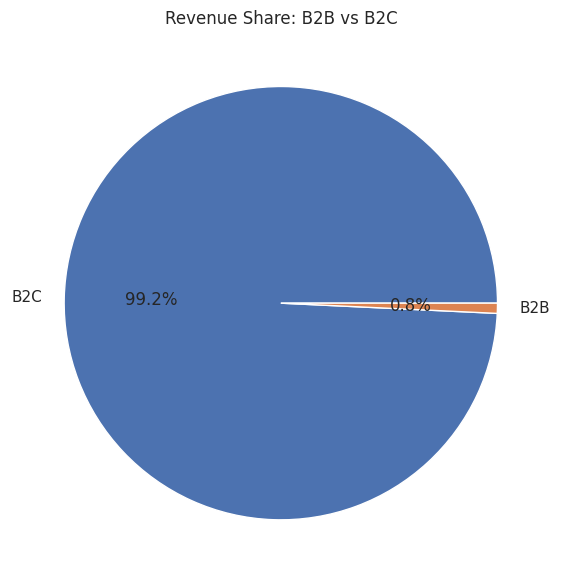

In [48]:
# Fulfilment method distribution
if 'Fulfilment' in df_clean.columns:
    plt.figure(figsize=(8,5))
    df_clean['Fulfilment'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
    plt.title('Fulfilment Distribution (by order count)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print('Fulfilment column missing.')

# B2B vs B2C revenue share
if 'B2B' in df_clean.columns and 'Amount' in df_clean.columns:
    b2b_rev = df_clean.groupby('B2B')['Amount'].sum()
    plt.figure(figsize=(6,6))
    # Use labels based on unique values if boolean-like
    labels = ['B2C','B2B'] if set(df_clean['B2B'].dropna().unique()) <= {0,1} else None
    b2b_rev.plot.pie(autopct='%1.1f%%', labels=labels)
    plt.title('Revenue Share: B2B vs B2C')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print('B2B or Amount column missing.')


## 📅 9. Weekly patterns: Day of week vs Revenue

Generates a heatmap of categories vs days of the week, showing revenue concentration. Useful for spotting shopping patterns (e.g., higher revenue on weekends, certain categories peaking on weekdays).


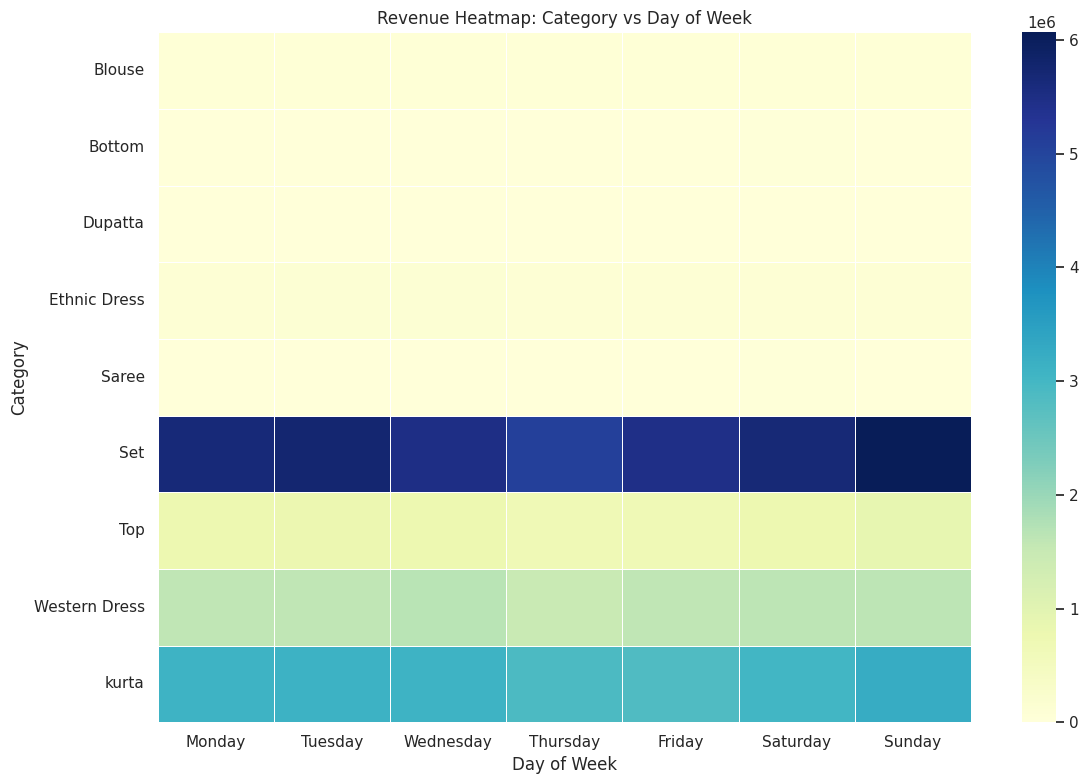

In [49]:
# Day of week revenue heatmap (Category x Day)
if 'day_of_week' in df_clean.columns and 'Amount' in df_clean.columns and 'Category' in df_clean.columns:
    pivot = df_clean.pivot_table(index='Category', columns='day_of_week', values='Amount', aggfunc='sum', fill_value=0)
    # Reorder days
    days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    cols = [c for c in days_order if c in pivot.columns]
    pivot = pivot[cols]
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot, cmap='YlGnBu', linewidths=.5)
    plt.title('Revenue Heatmap: Category vs Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()
else:
    print('Columns required for day_of_week heatmap are missing.')


## ⚠️ 10. Underperforming SKUs (candidates for review)

Identifies bottom 5% SKUs by revenue. Lists SKUs with very low revenue/quantity that may need action — discounting, bundling, or removal.

In [50]:
# List SKUs with low revenue and low qty (bottom 5% by revenue)
if 'SKU' in df_clean.columns and 'Amount' in df_clean.columns:
    sku_stats = df_clean.groupby('SKU').agg(Category=('Category', 'first'),total_revenue=('Amount','sum'), total_qty=('Qty','sum'), order_count=('SKU','count')).reset_index()
    threshold = sku_stats['total_revenue'].quantile(0.05)
    underperf = sku_stats[sku_stats['total_revenue'] <= threshold].sort_values('total_revenue')
    display(underperf.head(20))
    print(f"Bottom 5% revenue threshold: {threshold:.2f}")
else:
    print('SKU or Amount column missing.')

,SKU,Category,total_revenue,total_qty,order_count
4229,JNE3748-KR-S,kurta,0.0,1,1
62,BL020-71RED,Blouse,0.0,2,1
4944,JNE3897-KR-M,kurta,0.0,0,1
102,BL090-XS,Blouse,0.0,1,1
104,BL091-XL,Blouse,0.0,0,1
4911,JNE3891-TP-XXL,Top,0.0,0,1
4448,JNE3783-KR-XS,kurta,0.0,1,1
4427,JNE3780-KR-XS,kurta,0.0,0,1
4479,JNE3788-KR-L,kurta,0.0,1,2
174,BTM002-B-XXL,Bottom,0.0,0,4


Bottom 5% revenue threshold: 397.40


## 💾 11. Export: SKU-level aggregated file

Aggregates SKU-level performance metrics (revenue, quantity, avg revenue per unit, order count) and saves them into sku_summary.csv. This makes the insights portable for dashboards or BI tools.

In [51]:
# Export aggregated SKU-level summary for downstream use
if 'SKU' in df_clean.columns and 'Amount' in df_clean.columns and 'Qty' in df_clean.columns:
    sku_summary = df_clean.groupby('SKU').agg(
        total_revenue=('Amount','sum'),
        total_qty=('Qty','sum'),
        avg_rev_per_unit=('rev_per_unit','mean'),
        order_count=('SKU','count')
    ).reset_index().sort_values('total_revenue', ascending=False)
    out_path = Path('sku_summary.csv')
    sku_summary.to_csv(out_path, index=False)
    print('Exported sku_summary.csv to:', out_path)
else:
    print('Required columns missing; skipping export.')


Exported sku_summary.csv to: sku_summary.csv


### 💡 Insights & Recommendations (Template)

**Top-line findings**
- Based on the analysis, we can draw some preliminary insights about the Q2 2022 performance of Amazon India:
- The total revenue for Q2 2022 decreased by -18.77% from April to June, with May revenue experiencing a -9.06% decrease from April, and June revenue seeing a -10.68% decrease from May, which is a cause of concern.
- The revenue is dominated by the product category "Set," which accounts for 49.88% of total revenue, followed by kurta with 27.09% and Western Dress with 14.28%.
- The top 5 product categories by average price in dollars are Set (\$9.43), Saree (\$9.14), Western Dress (\$8.75), Ethnic Dress (\$8.26), and Top (\$6.09), indicating that these products are high-value orders.
- The total number of cancelled and returned orders was 49,178, which represents 17.53% of all orders. Of these, 14.22% were cancelled and 1.64% were returned.
- The average order amount by customer type is $8.21 for business customers and $7.37 for regular customers.
- The most popular product category varies by state, and it may be worthwhile to analyze the reasons behind these trends and invest in marketing campaigns or promotions accordingly.

**KPI Table**
- Total revenue: 14065496.23
- Total units sold: 21682
- Number of SKUs: 4448
- Bottom 5% revenue threshold: 319.00

**Actionable recommendations**
1. Use promotions to drive interest in the Western Dress product by targeting the top 50% of states ranked by sales revenue since their revenue is between 10 and 100 times more than the top ranked states by revenue in the lower 50%.
2. Prioritize inventory for the top 32% SKUs that  ontribute 80% of revenue.
3. Promote or discount SKUs in the underperforming list to clear stock.


